# Exploring a car data set using k-nearest neighbours

<p><img style="float: right; margin:5px 20px 5px 1px; width:30%" src="http://bestride.com/wp-content/uploads/2015/06/2012_mazda_mx-5-miata_convertible_grand-touring_fq_oem_4_2048.jpg"></p>
We explore working with a data set which contains information on variou cars. For each car, there is information about the technical aspects of the vehicle such as motors's displacement, the weight of the car, the miles per gallon, how fast it accelerates, and more. We plan to explore this data set using `KNearestNeighbor`.

## Pre-processing

In [607]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
cars = pd.read_csv("imports-85.data", header=None)
cars.columns = cnames

In [23]:
#Get names of columns

cnames = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
         "num_of_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
         "length", "width", "height", "curb_weight", "engine_type", "num_of_cylinders",
         "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
         "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [24]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


A handful of the columns such as `normalized_losses`, `wheel_base`, etc., are numeric, while others are not. The target column is `price` and is also numeric. Some have also not been rightly identified by pandas as numeric columns.

In [25]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [111]:
#Replace all "?" with np.nan
cars = cars.replace("?",np.nan)

In [112]:
cars_numeric = cars[["symboling", "normalized_losses", "num_of_doors", "wheel_base", "length", "width", "height", "curb_weight", "num_of_cylinders",
    "engine_size", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]].copy()

In [61]:
cars_numeric.head()

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,two,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,four,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,four,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450


In [115]:
#Replace the number of doors with numeric values
cars_numeric["num_of_doors"].unique()
mapvar = {"four": 4, "two": 2}

In [116]:
cars_numeric["num_of_doors"] = cars_numeric["num_of_doors"].map(mapvar)

In [117]:
#Replace the number of cylinders with numeric values
cars_numeric["num_of_cylinders"].unique()
mapvarcyl = {"four": 4, "six": 6, "five": 5, "three":3, "twelve": 12, "two": 2, "eight": 8}
cars_numeric["num_of_cylinders"] = cars_numeric["num_of_cylinders"].map(mapvarcyl)

In [118]:
cars_numeric.head()

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450


In [119]:
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
num_of_doors         203 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
num_of_cylinders     205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(6), int64(6), object(6)
memory usage: 28.9+ KB


Some of the variables are still identified as objects by `pandas`. Now, we convert these into numeric types.

In [120]:
cars_numeric[["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm",
             "price"]] = cars_numeric[["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm",
             "price"]].apply(lambda x: x.astype(float))

In [121]:
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
num_of_doors         203 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
num_of_cylinders     205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(12), int64(6)
memory usage: 28.9 KB


In [134]:
cars_numeric.head()

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Now, we have all features converted into numeric types. However, there are still missing values. We will fill all except `num_of_doors` with the mean values.

In [143]:
mode_num_of_doors = cars_numeric["num_of_doors"].mode().values[0]
cars_numeric["num_of_doors"] = cars_numeric["num_of_doors"].fillna(value=mode_num_of_doors)

In [146]:
cars_numeric.isnull().sum()

symboling             0
normalized_losses    41
num_of_doors          0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
num_of_cylinders      0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [147]:
mean_normalized_losses = cars_numeric["normalized_losses"].mean()

In [148]:
cars_numeric["normalized_losses"] = cars_numeric["normalized_losses"].fillna(value=mean_normalized_losses)

In [149]:
cars_numeric.isnull().sum()

symboling            0
normalized_losses    0
num_of_doors         0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [150]:
cars_numeric.columns

Index(['symboling', 'normalized_losses', 'num_of_doors', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'num_of_cylinders',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [151]:
cars_numeric[["bore", "stroke", "horsepower", "peak_rpm", "price"]] = \
cars_numeric[["bore", "stroke", "horsepower", "peak_rpm", "price"]].apply(lambda x: x.fillna(value=x.mean()))

In [152]:
cars_numeric.isnull().sum()

symboling            0
normalized_losses    0
num_of_doors         0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Now, we have all missing values filled.

We normalize all columns so that all values range from 0 to 1. This is to prevent some variables having more weight than others in the analyses to follow.

In [447]:
def normalize_df(df):
    return (df - df.min()) / (df.max() - df.min())

In [448]:
cars_numeric_normalized = normalize_df(cars_numeric)
cars_numeric_normalized.head()

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.298429,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,1.0,0.298429,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.6,0.298429,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.8,0.518325,1.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.8,0.518325,1.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


## Modeling

In [479]:
def knn_train_test(df, features, target):
    np.random.seed(0)
    
    #Obtain and shuffle indices
    ind = df.index
    shuffled_ind = np.random.permutation(ind)
    split = int(0.7*len(shuffled_ind))
    
    #Split into test and training sets
    train_df = df.iloc[shuffled_ind].iloc[:split]
    test_df = df.iloc[shuffled_ind].iloc[split:]
    
    #Instantiate KNN class & make predictions
    knn = KNeighborsRegressor()
    knn.fit(normalize_df(train_df[features]), train_df[target])
    
    #Transform test set using details from training set
    norm_test_df = (test_df - train_df.min()) / (train_df.max() - train_df.min())
    predictions = knn.predict(norm_test_df[features])
    
    #Obtain metrics
    mse = mean_squared_error(test_df[target], predictions)
    rmse = mse ** (1/2)
    
    return rmse
    

We test, first, univariate models to see which feature performs best in achieving the best `rmse` score. The normalization is conducted inside the function.

In [434]:
cars_numeric_normalized.columns

Index(['symboling', 'normalized_losses', 'num_of_doors', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'num_of_cylinders',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [437]:
# features = ["symboling"]
target = "price"
rmse_values_wok = list()
rmse = 0
for features in cars_numeric.columns[:-1]:
    rmse = knn_train_test(cars_numeric, [features], target)
    rmse_values_wok+=[(features, rmse)]

In [439]:
rmse_values_wok = dict(rmse_values_wok)
rmse_values_wok

{'bore': 7175.969398724644,
 'city_mpg': 5410.957517337565,
 'compression_ratio': 6206.360246149368,
 'curb_weight': 4155.6416050976395,
 'engine_size': 4080.956456219681,
 'height': 7685.859107362741,
 'highway_mpg': 4125.492781049713,
 'horsepower': 4369.727588884395,
 'length': 5618.745403850798,
 'normalized_losses': 7228.7069227676575,
 'num_of_cylinders': 5827.212503530153,
 'num_of_doors': 8969.325029252705,
 'peak_rpm': 8258.412856005798,
 'stroke': 7261.553237018291,
 'symboling': 8066.835629028385,
 'wheel_base': 6479.7868786940335,
 'width': 4263.052324112853}

In [441]:
ind = min(rmse_values_wok, key = lambda x: rmse_values_wok.get(x))
best_rmse_feature_wok = {ind: rmse_values_wok[ind]}
best_rmse_feature_wok

{'engine_size': 4080.956456219681}

Of all the features, the feature which gives the best root mean squared error is `engine_size`. 

Now, we modify the `knn_train_test()` function to accept a parameter for the `k` value in the regressor. We will test a univariate model for `k` values of 1, 3, 5, 7, 9.

In [602]:
def knn_train_test(df, features, target, k):
    np.random.seed(0)
    
    #Obtain and shuffle indices
    ind = df.index
    shuffled_ind = np.random.permutation(ind)
    split = int(0.7*len(shuffled_ind))
    
    #Split into test and training sets
    train_df = df.iloc[shuffled_ind].iloc[:split]
    test_df = df.iloc[shuffled_ind].iloc[split:]
    
    #Instantiate KNN class & make predictions
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(normalize_df(train_df[features]), train_df[target])
    norm_test_df = (test_df - train_df.min()) / (train_df.max() - train_df.min())
    predictions = knn.predict(norm_test_df[features])
    
    #Obtain metrics
    mse = mean_squared_error(test_df[target], predictions)
    rmse = mse ** (1/2)
    
    return rmse
    

In [443]:
# features = ["symboling"]
target = "price"
rmse_values_wk = dict()
rmse = 0
for features in cars_numeric.columns[:-1]:
    for k in [1,3,5,7,9]:
        rmse = knn_train_test(cars_numeric, [features], target, k)
        rmse_values_wk[(features,k)] = rmse

In [444]:
import itertools
dict(itertools.islice(rmse_values_wk.items(), 5))

{('bore', 7): 7053.602587898592,
 ('curb_weight', 9): 4220.269325172738,
 ('highway_mpg', 1): 6778.474404074933,
 ('horsepower', 7): 4289.547839182253,
 ('wheel_base', 5): 6479.7868786940335}

In [445]:
ind = min(rmse_values, key = lambda x: rmse_values_wk.get(x))
best_rmse_feature_wk = {ind: rmse_values_wk[ind]}
best_rmse_feature_wk

{('width', 1): 2844.536661665748}

In [686]:
#Generate dictionary of rmse values
rmse_dict = {}
for i,j in rmse_values_wk.items():
#     print(i,j)
    if i[0] in rmse_dict:
        rmse_dict[i[0]].update({i[1]: j})
    else:
        rmse_dict[i[0]] = {i[1]: j}

In [687]:
rmse_df = pd.DataFrame(rmse_dict)
rmse_df

,bore,city_mpg,compression_ratio,curb_weight,engine_size,height,highway_mpg,horsepower,length,normalized_losses,num_of_cylinders,num_of_doors,peak_rpm,stroke,symboling,wheel_base,width
1,7829.495239,7371.547158,8295.828020,4653.496703,3481.009932,9012.527583,6778.474404,3158.420575,4665.990515,8033.912237,6994.537714,10263.449645,10875.419602,6076.992559,10494.126654,4206.028928,2844.536662
3,6159.877500,6157.680718,6177.272199,4269.078498,3910.982060,7695.834149,4530.957212,4389.359697,5754.888386,7019.546677,6589.687571,9833.026530,7953.729659,6984.317793,8789.448544,6031.615618,4361.337398
5,7175.969399,5410.957517,6206.360246,4155.641605,4080.956456,7685.859107,4125.492781,4369.727589,5618.745404,7228.706923,5827.212504,8969.325029,8258.412856,7261.553237,8066.835629,6479.786879,4263.052324
7,7053.602588,5165.344554,6268.878439,4217.134611,4181.585948,7636.499290,4314.035919,4289.547839,5849.538214,7472.673225,6014.167627,8999.889020,8193.466488,7602.764047,7412.586773,6779.872624,4595.239368
9,6775.163790,5401.875083,6467.417387,4220.269325,4155.855272,7573.761727,4253.779511,4604.785873,6046.900218,7654.130802,5781.003992,8777.013017,8018.065379,7708.553082,7490.246201,7132.993521,4531.171657


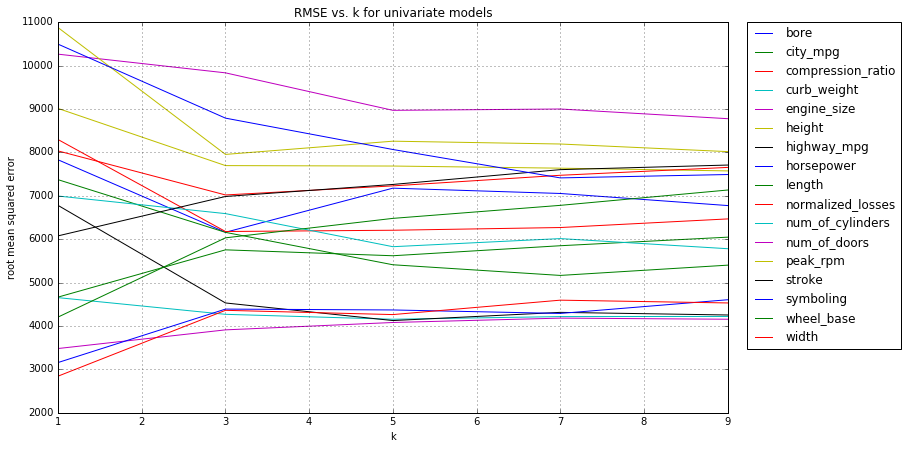

In [722]:
rmse_df.plot.line(figsize=(12,7))
plt.legend(bbox_to_anchor=(1.02,1.015), loc="upper left")
plt.grid(True)
plt.xlabel("k")
plt.ylabel("root mean squared error")
plt.title("RMSE vs. k for univariate models")
plt.show()

Display average of `rmse` values over the different `k`'s by feature

In [699]:
rmse_df.mean(axis=0).sort_values()

engine_size          3962.077934
width                4119.067482
horsepower           4162.368315
curb_weight          4303.124148
highway_mpg          4800.547965
length               5587.212548
city_mpg             5901.481006
wheel_base           6126.059514
num_of_cylinders     6241.321881
compression_ratio    6683.151258
bore                 6998.821703
stroke               7126.836144
normalized_losses    7481.793973
height               7920.896371
symboling            8450.648760
peak_rpm             8659.818797
num_of_doors         9368.540648
dtype: float64

For the univariate models, `width`, with a `k` value of just 1, gives the best root mean squared error value.

We test the `knn_train_test()` with more than one variables, so that we can create bivariate and multivariate models.

We use the best feaures from earlier to train and test a multivariate k-nearest neighbours model using the default value of `k`.  We will do this for best two until the best five features.

In [446]:
cars_numeric.columns

Index(['symboling', 'normalized_losses', 'num_of_doors', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'num_of_cylinders',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [476]:
sorted(rmse_values_wok.items(), key=lambda x:x[1])

[('engine_size', 4080.956456219681),
 ('highway_mpg', 4125.492781049713),
 ('curb_weight', 4155.6416050976395),
 ('width', 4263.052324112853),
 ('horsepower', 4369.727588884395),
 ('city_mpg', 5410.957517337565),
 ('length', 5618.745403850798),
 ('num_of_cylinders', 5827.212503530153),
 ('compression_ratio', 6206.360246149368),
 ('wheel_base', 6479.7868786940335),
 ('bore', 7175.969398724644),
 ('normalized_losses', 7228.7069227676575),
 ('stroke', 7261.553237018291),
 ('height', 7685.859107362741),
 ('symboling', 8066.835629028385),
 ('peak_rpm', 8258.412856005798),
 ('num_of_doors', 8969.325029252705)]

We will be obtaining the `rmse` for the best features until `horsepower`.

In [598]:
temp = list()
target = "price"
rmse_values_wf = list()
rmse_value = 0
tempcopy = []
for i in (sorted(rmse_values_wok.items(), key=lambda x:x[1]))[:5]:
    temp += [i[0]]
    rmse_value = knn_train_test(cars_numeric, temp, target)
    tempcopy = temp.copy()
    rmse_values_wf += [(tempcopy, rmse_value)]


In [599]:
rmse_values_wf

[(['engine_size'], 4080.956456219681),
 (['engine_size', 'highway_mpg'], 3602.684436540809),
 (['engine_size', 'highway_mpg', 'curb_weight'], 3918.0247769990356),
 (['engine_size', 'highway_mpg', 'curb_weight', 'width'], 4032.767800343178),
 (['engine_size', 'highway_mpg', 'curb_weight', 'width', 'horsepower'],
  3666.4576055901784)]

When we use features with progressively lower `rmse` in the univariate models, we find that combining the features does not necessarily reduce `rmse`. `engine_size` and `highway_mpg` provided the lowest `rmse`.

We attempt with the best three features and generate the `rmse` for `k` values 1 to 25.

In [619]:
top_3_features = ["engine_size", "highway_mpg", "curb_weight"]
target = "price"
rmse_values_top_3 = []
for i in range(1,26):
    rmse_values_top_3 += [knn_train_test(cars_numeric, top_3_features, target, i)]

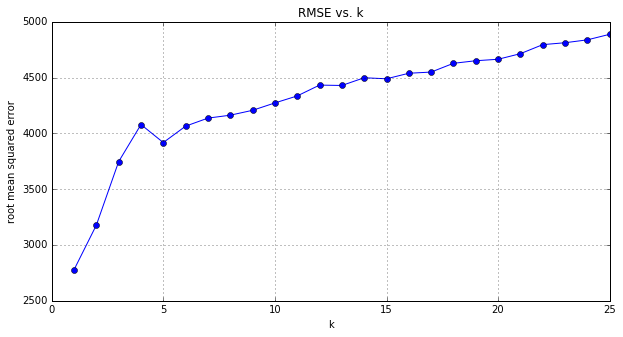

In [620]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,26), rmse_values_top_3, 'o-')
plt.xlabel("k")
plt.ylabel("root mean squared error")
plt.title("RMSE vs. k")
plt.grid(True)
plt.show()

It appears the optimal `k` value is 1. Increasing the value of `k` merely increases the `rmse` and adds no further advantage. Increasing `k` apparently adds more noisy to the model results by factoring in farther instances which has no more advantage than to introduce errors.

Retrying the above with all the features produces nearly the same results.

In [621]:
top_3_features = ['symboling', 'normalized_losses', 'num_of_doors', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'num_of_cylinders',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg']
target = "price"
rmse_values_top_3 = []
for i in range(1,26):
    rmse_values_top_3 += [knn_train_test(cars_numeric, top_3_features, target, i)]

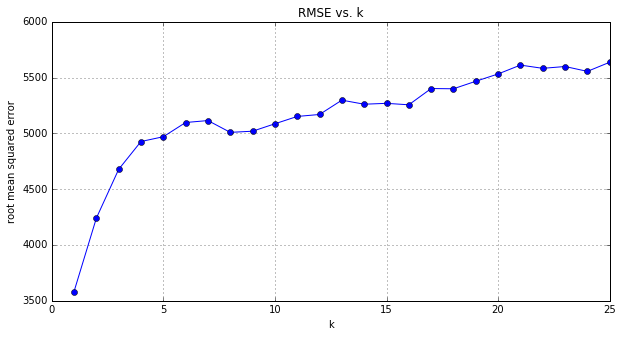

In [622]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,26), rmse_values_top_3, 'o-')
plt.xlabel("k")
plt.ylabel("root mean squared error")
plt.title("RMSE vs. k")
plt.grid(True)
plt.show()

Now, we use the top features and `k` values of 1 to 25

In [703]:
top_features = list(zip(*sorted(rmse_values_wok.items(), key=lambda x:x[1])))[0]
top_features

('engine_size',
 'highway_mpg',
 'curb_weight',
 'width',
 'horsepower',
 'city_mpg',
 'length',
 'num_of_cylinders',
 'compression_ratio',
 'wheel_base',
 'bore',
 'normalized_losses',
 'stroke',
 'height',
 'symboling',
 'peak_rpm',
 'num_of_doors')

In [711]:
temp=[]
rmse_values_top_features = {}
target = "price"
for feature in top_features:
    temp+=[feature]
    rmse_values=[]
    for i in range(1,26):
        rmse_values += [knn_train_test(cars_numeric, temp, target, i)]
    rmse_values_top_features[len(temp)]= rmse_values
    

In [743]:
rmse_values_top_features_df = pd.DataFrame(rmse_values_top_features, index=np.arange(1,26))

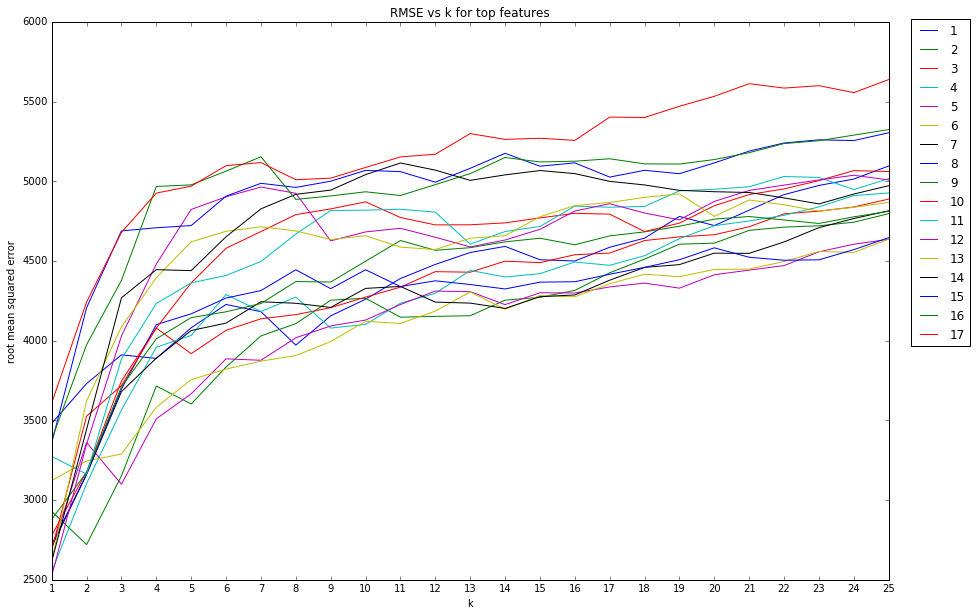

In [746]:
rmse_values_top_features_df.plot.line(figsize=(15,10))
plt.legend(bbox_to_anchor=(1.02,1.015), loc="upper left")
plt.xticks(np.arange(1,26))
plt.xlabel("k")
plt.ylabel("root mean squared error")
plt.title("RMSE vs k for top features")
plt.show()

It would seem lower `k` values provide the best `rmse` values even for the top features